# Preparation

**Gather Data**

In [ ]:
# Importieren der benötigten Bibliotheken

# Datenmanipulation
import pandas as pd
import numpy as np

# Visualisierung
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparameter-Optimierung
from skopt import BayesSearchCV
from skopt.space import Integer

# Modellagnostische Interpretation
#from pdpbox import pdp

# Warnings unterdrücken
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action="ignore", category=DataConversionWarning)
warnings.filterwarnings(action="ignore", category=FutureWarning)

# Eigene Module
from dpp.data import load_from_kaggle


c:\Users\IAmBlindNotDeaf\Desktop\StackFuel Weiterbildung\Abschlussprojekt\Dpp-Stackfuel-Data-Science\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Explorative Datenanalayse (EDA)

**Understand Data**

In [ ]:
# Daten von Kaggle herunterladen
dataset_link = "thedevastator/improving-naval-vessel-condition-through-machine" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\improving-naval-vessel-condition-through-machine' already exists with files. Skipping download (replace=False).


In [ ]:
# Anzeigen der heruntergeladenen Daten
files

['data.csv']

In [ ]:
# Einlesen der Daten
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
# Erste Übersicht über die Daten
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)

# Übersicht über die Spalten
pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(11934, 19)

'Description'

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00,11934.0,11934.00,11934.00,11934.0,11934.00,11934.00,11934.00,11934.00,11934.00,11934.00
mean,5966.50,5.17,15.00,27247.50,2136.29,8200.95,227.34,227.34,735.50,288.0,646.22,2.35,1.0,12.30,1.03,33.64,0.66,0.98,0.99
std,3445.19,2.63,7.75,22148.61,774.08,1091.32,200.50,200.50,173.68,0.0,72.68,1.08,0.0,5.34,0.01,25.84,0.51,0.01,0.01
min,0.00,1.14,3.00,253.55,1307.68,6589.00,5.30,5.30,442.36,288.0,540.44,1.09,1.0,5.83,1.02,0.00,0.07,0.95,0.98
25%,2983.25,3.14,9.00,8375.88,1386.76,7058.32,60.32,60.32,589.87,288.0,578.09,1.39,1.0,7.45,1.02,13.68,0.25,0.96,0.98
50%,5966.50,5.14,15.00,21630.66,1924.33,8482.08,175.27,175.27,706.04,288.0,637.14,2.08,1.0,11.09,1.03,25.28,0.50,0.98,0.99
75%,8949.75,7.15,21.00,39001.43,2678.08,9132.61,332.36,332.36,834.07,288.0,693.92,2.98,1.0,15.66,1.04,44.55,0.88,0.99,0.99
max,11933.00,9.30,27.00,72784.87,3560.74,9797.10,645.25,645.25,1115.80,288.0,789.09,4.56,1.0,23.14,1.05,92.56,1.83,1.00,1.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
index,int64,0,11934,"[8437, 5931, 6309]"
Lever position,float64,0,9,"[5.14, 7.148, 9.3]"
Ship speed (v),int64,0,9,"[12, 27, 18]"
Gas Turbine (GT) shaft torque (GTT) [kN m],float64,0,11430,"[14721.905, 29761.669, 50987.582]"
GT rate of revolutions (GTn) [rpm],float64,0,3888,"[3087.528, 3087.25, 1346.673]"
Gas Generator rate of revolutions (GGn) [rpm],float64,0,11834,"[6800.141, 8816.768, 8467.494]"
Starboard Propeller Torque (Ts) [kN],float64,0,4286,"[246.029, 332.416, 332.525]"
Port Propeller Torque (Tp) [kN],float64,0,4286,"[175.288, 246.194, 175.225]"
Hight Pressure (HP) Turbine exit temperature (T48) [C],float64,0,11772,"[788.999, 452.533, 899.951]"
GT Compressor inlet air temperature (T1) [C],int64,0,1,"[288, 288, 288]"


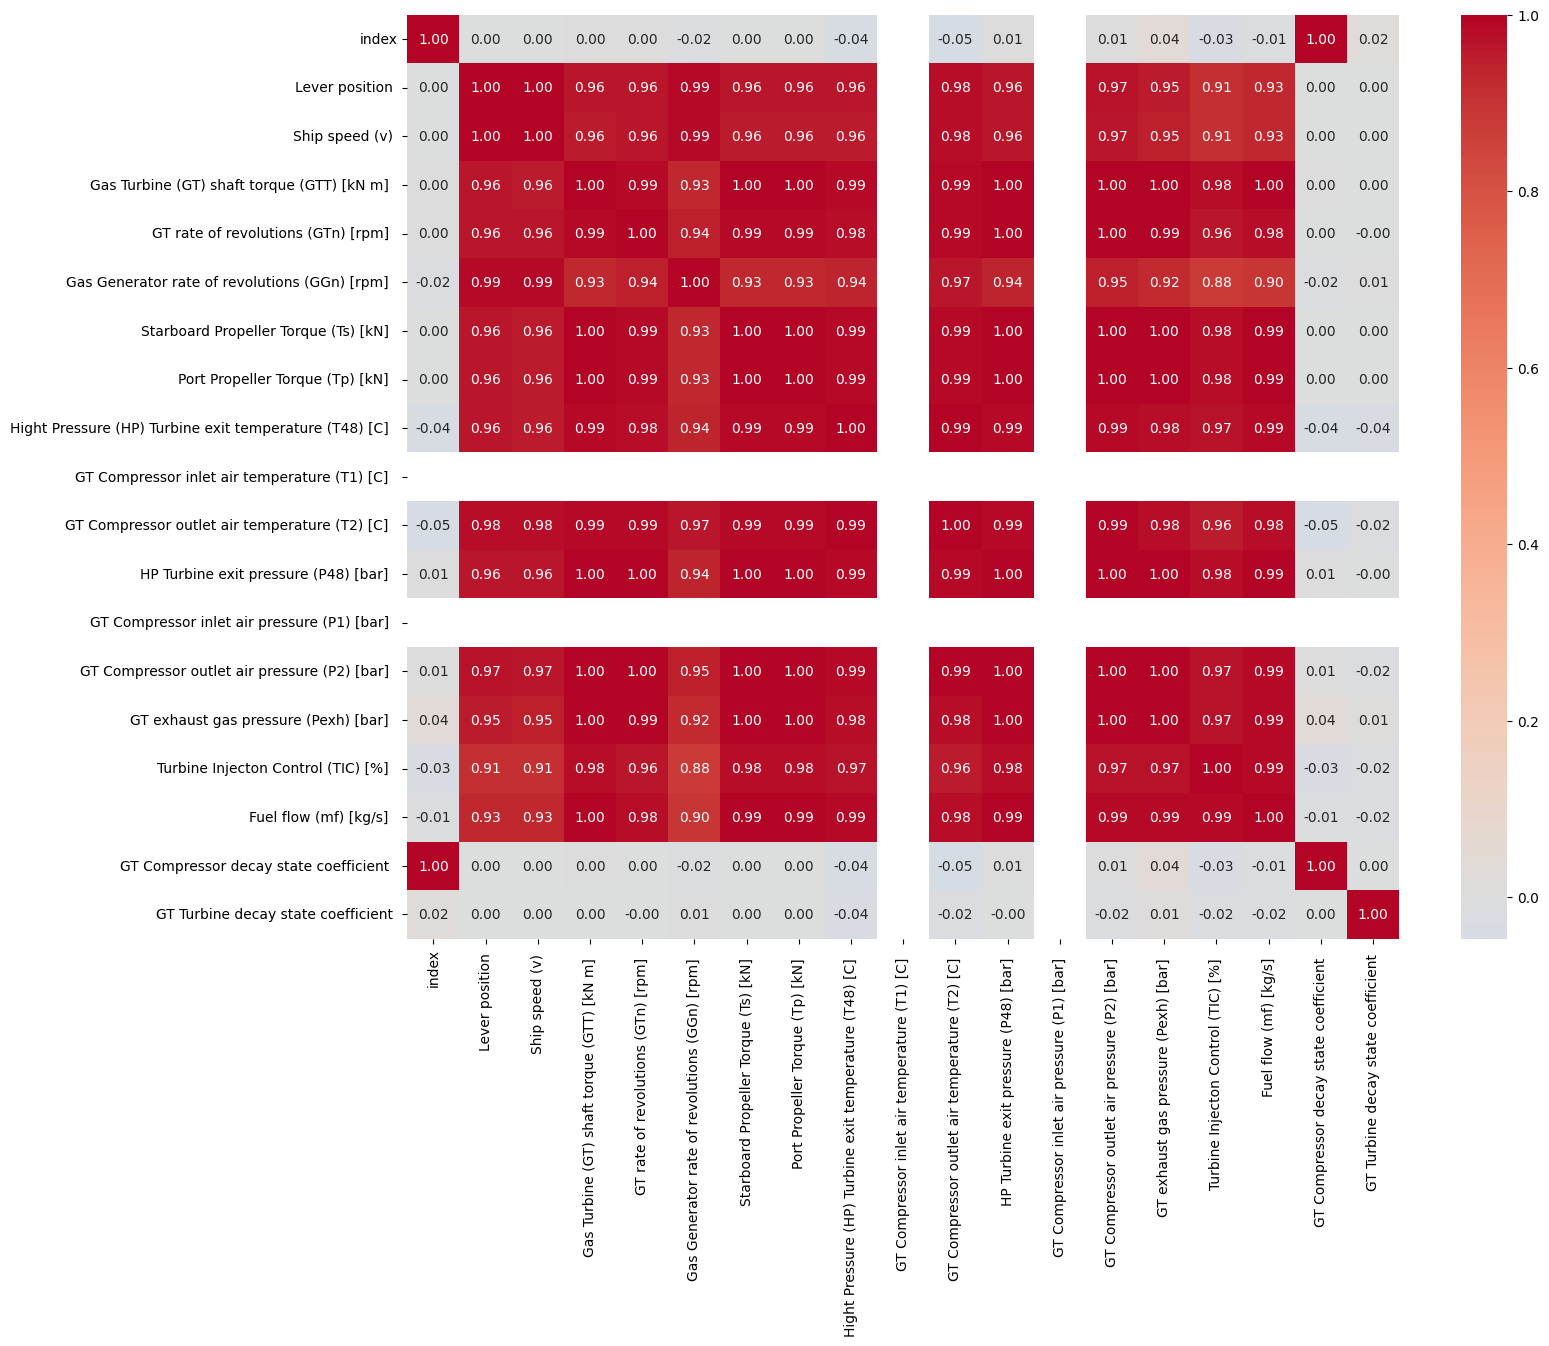

In [9]:
# Korrelationen visualisieren
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", center=0);

GT Turbine decay state coefficient 
0.975    0.038462
0.976    0.038462
0.977    0.038462
0.978    0.038462
0.979    0.038462
0.980    0.038462
0.981    0.038462
0.982    0.038462
0.983    0.038462
0.984    0.038462
0.985    0.038462
0.986    0.038462
0.987    0.038462
0.988    0.038462
0.989    0.038462
0.990    0.038462
0.991    0.038462
0.992    0.038462
0.993    0.038462
0.994    0.038462
0.995    0.038462
0.996    0.038462
0.997    0.038462
0.998    0.038462
0.999    0.038462
1.000    0.038462
Name: proportion, dtype: float64
